<h1 style="direction:rtl;text-align:center;font-family:Yekan, sans-serif;color:#ffffff;background-color:#cca3db;font-size:48p"><strong>سوال اول</strong> </h1>

In [1]:
import pandas as pd  
import numpy as np

<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> a) </strong></h3>

In [2]:
df = pd.read_csv('housing.csv')
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.dropna(inplace=True)
df.shape

(20433, 10)

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl"> 
به کمک dropna سطرهای حاوی مقادیر Null را حذف می کنیم.

</h4>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> b) </strong></h3>

In [4]:
df.groupby('ocean_proximity')['ocean_proximity'].count()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
ISLAND           5
NEAR BAY      2270
NEAR OCEAN    2628
Name: ocean_proximity, dtype: int64

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl"> 
  ابتدا سطرهای دیتاست را بر اساس متغیرocean_proximity دسته بندی می کنیم تا به مقادیر یکتا دست بیابیم سپس به کمک count تعداد سطرهای هر دسته را می شماریم.  
</h4>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> c) </strong></h3>

In [5]:
import matplotlib.pyplot as plt

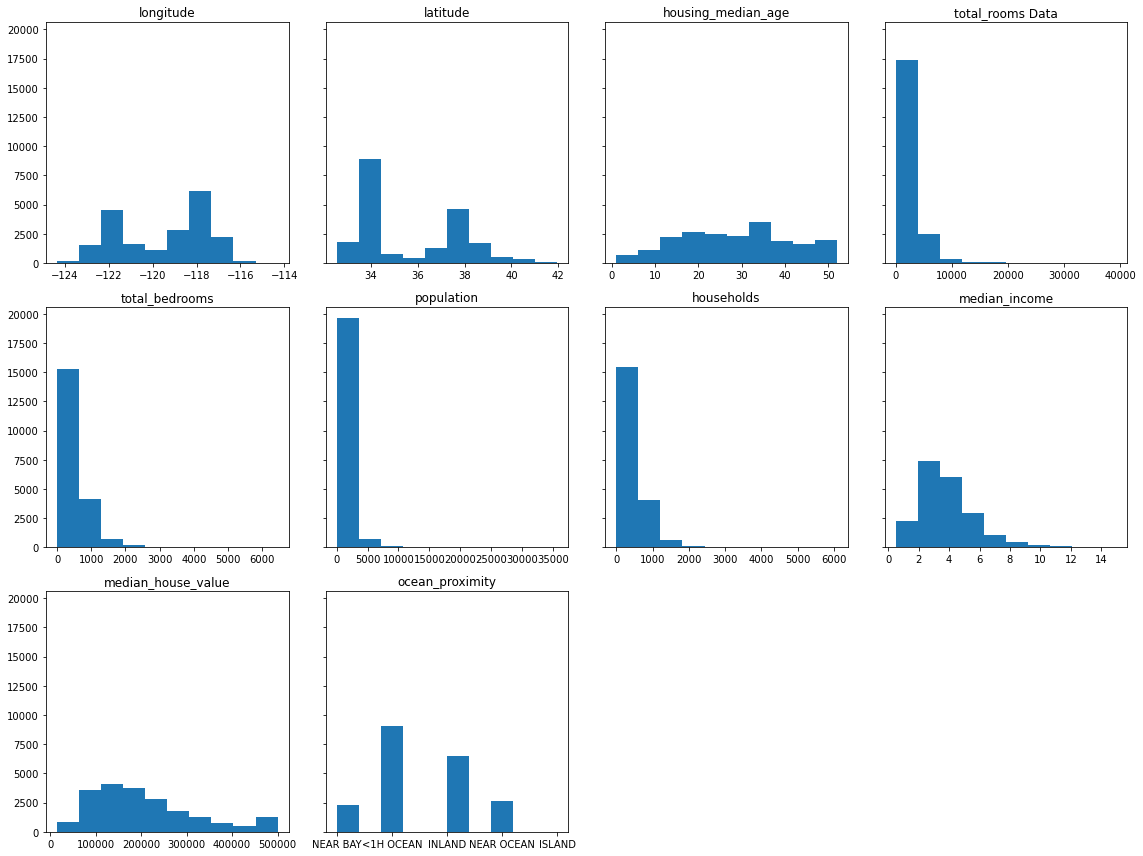

In [6]:
fig, axs = plt.subplots(3, 4, sharey=True,tight_layout=True,figsize=(16,12))

axs[0,0].hist(df['longitude'])
axs[0,0].set_title("longitude")

axs[0,1].hist(df['latitude'])
axs[0,1].set_title("latitude")

axs[0,2].hist(df['housing_median_age'])
axs[0,2].set_title("housing_median_age")

axs[0,3].hist(df['total_rooms'])
axs[0,3].set_title("total_rooms Data")

axs[1,0].hist(df['total_bedrooms'])
axs[1,0].set_title("total_bedrooms")

axs[1,1].hist(df['population'])
axs[1,1].set_title("population")

axs[1,2].hist(df['households'])
axs[1,2].set_title("households")

axs[1,3].hist(df['median_income'])
axs[1,3].set_title("median_income")

axs[2,0].hist(df['median_house_value'])
axs[2,0].set_title("median_house_value")

axs[2,1].hist(df['ocean_proximity'])
axs[2,1].set_title("ocean_proximity")

fig.delaxes(axs[2][2])
fig.delaxes(axs[2][3])

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl">
ابتدا پلات را به 12 ساب پلات با ابعاد 3در4 تقسیم می کنیم و در هریک از آنها یک ویژگی را ترسیم کرده و عنوان مناسب را به آن منتسب می کنیم. سپس یاب پلات های اضافه را حذف می کنیم.
</h4>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> d) </strong></h3>

In [7]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import descartes

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl">
ابتدا کتابخانه های لازم را اضافه می کنیم.
</h4>


In [8]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl">
به کمک longitude وlatitude که در دیتاست هستند زوج مختصات xy را میسازیم و آنها را در geometery ذخیره می کنیم 
</h4>


<AxesSubplot:>

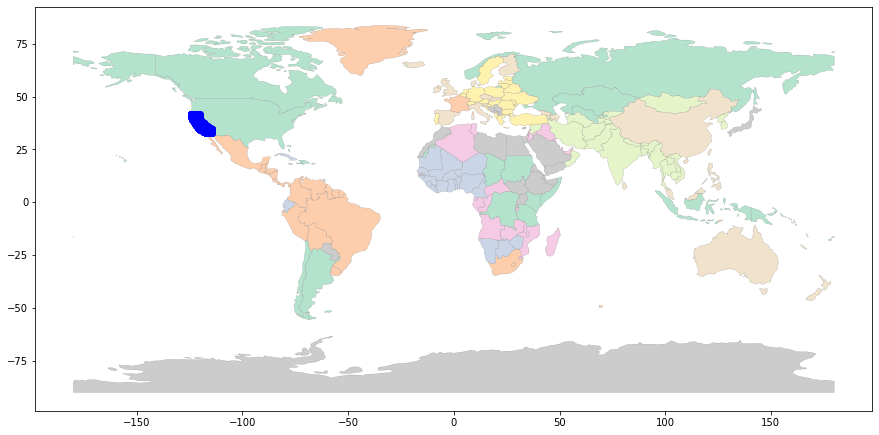

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(edgecolor='gray',linewidth=0.2,cmap='Pastel2',figsize=(15,15))
gdf.plot(ax=ax, color='blue',figsize=(15,15))

In [10]:
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl;line-height: 1.7;">
    دیتاست آماده naturalearth_lowres را از geopandas می خوانیم و در دیتافریمی به نامworld ذخیره می کنیم.
    
    سپسworld  را با ویژگی هایی مانند رنگ مرزهای طوسی با اندازه 0.2 و colormap ی تحت نام Pastel2 رسم می کنیم و سپس gdf را که حاوی اطلاعات جغرافیایی مختصات ما روی نقشه جهان است هم در همان پلات با رنگ آبی ترسیم می کنیم.
    آنچه مشهود است این است که تراکم نقاط در قاره آمریکای شمالی و کشور آمریکا است.
</h4>


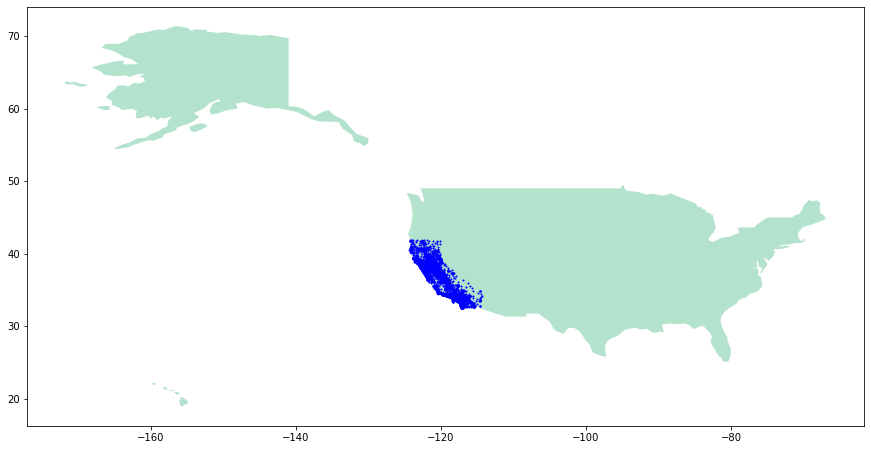

In [11]:
gdf.plot(ax=world[(world['continent']=='North America')&(world['name']=='United States of America')].plot(figsize=(15, 15),
                                                                cmap='Pastel2'), marker='o', color='blue', markersize=1);

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl;line-height: 1.7;">
    همچنین در کشور آمریکا هم تراکم در ایالت کالیفرنیا است.
</h4>


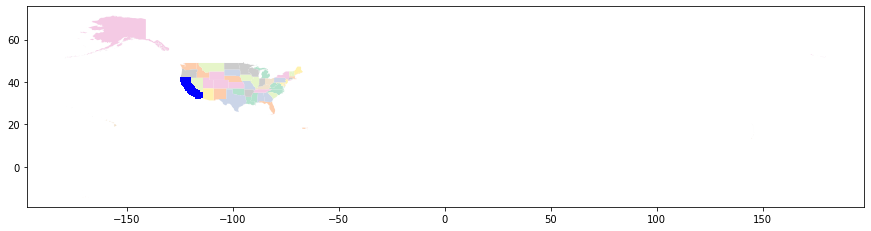

In [12]:
states = gpd.read_file('./cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf.plot(ax=states.plot(figsize=(15, 15),cmap='Pastel2'), marker='+', color='blue', markersize=2);

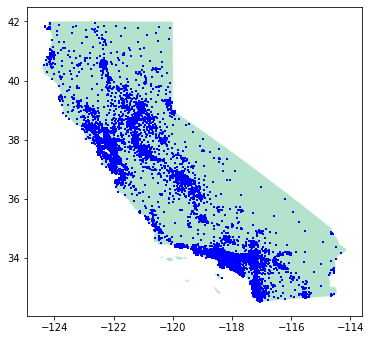

In [13]:
states = gpd.read_file('./cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf.plot(ax=states[states['STUSPS']=='CA'].plot(figsize=(6, 6),cmap='Pastel2'), marker='+', color='blue', markersize=2);

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl;line-height: 1.7;">
و پراکندگی در ایالت کالیفرنیا هم از طریق دریافت فایل ایالات و لود کردن آن و نمایش این ایالت قابل مشاهده است
</h4>


## 2nd Method : Matplotlib

In [14]:
import matplotlib.image as mpimg

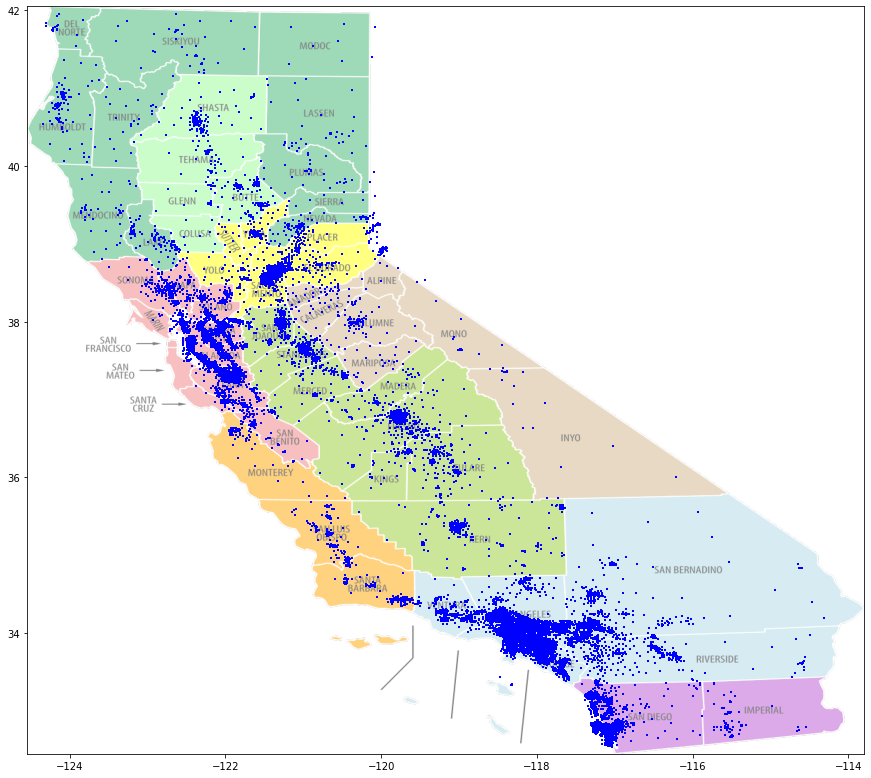

In [29]:
california_img=mpimg.imread('california.png')
ax = gdf.plot( figsize=(15,15), marker='+', color='blue', markersize=2)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

<h4 style="direction:rtl;text-align:right;font-family:Yekan, sans-serif;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl">اینبار تصویر نقشه و نقاط مختصات را همزمان پلات می کنمی. </h4>
